# About Dataset
HR Analytics helps us with interpreting organizational data. It finds the people-related trends in the data and allows the HR Department to take the appropriate steps to keep the organization running smoothly and profitably. Attrition in a corporate setup is one of the complex challenges that the people managers and the HRs personnel have to deal with.

Interestingly, machine learning models can be deployed to predict potential attrition cases, helping the appropriate HR Personnel take the necessary steps to retain the employee.

**Tasks to perform: **

Data Cleaning:

• Deleting redundant columns.

• Renaming the columns.

• Dropping duplicates.

• Cleaning individual columns.

• Remove the NaN values from the dataset

• Check for some more Transformations


Data Visualization:

• Plot a correlation map for all numeric variables

• Overtime

• Marital Status

• Job Role

• Gender

• Education Field

• Department

• Business Travel

• Relation between Overtime and Age

• Total Working Years

• Education Level

• Number of Companies Worked

• Distance from Home

--------------------------------------------------------------------------------------------------------------------------

Importing Libraries

In [421]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import plotly.express as px
import plotly.graph_objects as go
import scipy
from scipy.stats import chi2_contingency 
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
import plotly.figure_factory as ff

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score


Importing Dataset

In [422]:
data = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")


display first 5 rows of dataset

In [423]:
data.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Display last 5 rows of dataset

In [424]:
data.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


Describe dataset

In [425]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Correlation of parameters in the dataset

In [426]:
# corr=data.corr()
# corr

Diaplay Shape of Dataset

In [427]:
print(data.shape)

(1470, 35)


Display Size od Dataset

In [428]:
data.size 

51450

To check any null valuse in the Dataset

In [429]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Employee Attrition by Department and Employee Attrition Statistics Graph

In [430]:
fig=make_subplots(rows=1, cols=2, subplot_titles=("", "Employee Attrition by Department"),specs=[[{"type": "bar"}, {"type": "pie"}]])

# Bar chart
plot_df=data['Attrition'].value_counts(normalize=True)
plot_df=plot_df.mul(100).rename('Percent').reset_index().sort_values('Percent')
plot_df.rename(columns={'index':'Attrition'}, inplace=True)
plot_df['Attrition']=['Former Employees' if i == 'Yes' else 'Current Employees' for i in plot_df['Attrition']]
x=plot_df['Attrition']
y=plot_df['Percent']
fig.add_trace(go.Bar(x=x, y=y, text=y,opacity=.8, hovertemplate='Employee Attrition Rate<br>%{x}: %{y:.3}%<extra></extra>', showlegend=False), row=1, col=1)
fig.update_traces(texttemplate='%{text:.3s}%', textposition='outside', marker_line=dict(width=1, color='#1F0202'), marker_color=['#C02B34','#CDBBA7'])
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='gray')
fig.update_layout(yaxis_ticksuffix = '%')

# Pie chart
plot_df2=data[data.Attrition=='Yes']
plot_df2=plot_df2['Department'].value_counts(normalize=True)
plot_df2=plot_df2.mul(100).rename('Percent').reset_index().sort_values('Percent', ascending=False)
plot_df2.rename(columns={'index':'Department'}, inplace=True)
fig.add_trace(go.Pie(labels=plot_df2['Department'], values=plot_df2['Percent'], opacity=0.85, hole=0.4, hovertemplate='%{label}<br>Attrition Rate: %{value:.3}%<extra></extra>', marker_colors=['#587D65','#ADC4B2','#D1C9C2']), row=1, col=2)

fig.update_yaxes(tickmode = 'array', range=[0, 90], dtick=5)
fig.update_traces(textfont_size=14,textfont_color='black',marker=dict(line=dict(color='#28221D', width=1)))
fig.update_layout(title_text="Employee Attrition Statistics", font_color='#28221D', paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0')      
fig.show()

Graph of Attrition Rates by Department and Gender

In [431]:
plot_df = data.groupby(['Gender','Department'])['Attrition'].value_counts(normalize=True)
plot_df = plot_df.mul(100).rename('Percent').reset_index()
fig = px.bar(plot_df, x="Department", y="Percent", color="Attrition", barmode="group",
            text='Percent', opacity=.75, facet_col="Gender", category_orders={'Attrition': ['Yes', 'No']},
            color_discrete_map={'Yes': '#C02B34','No': '#CDBBA7'}) 
fig.update_traces(texttemplate='%{text:.3s}%', textposition='outside',
                  marker_line=dict(width=1, color='#28221D'),  width=.4)
fig.update_layout(title_text='Attrition Rates by Department and Gender', yaxis_ticksuffix = '%',
                  paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0',font_color='#28221D',
                  height=500, xaxis=dict(tickangle=30))
fig.update_xaxes(showticklabels=True,tickangle=30,col=2)
fig.update_yaxes(title = "", zeroline=True, zerolinewidth=1, zerolinecolor='#28221D')
fig.show()

Graph of Attrition Rates by Work Life Balance and Gender

In [432]:
plot_df = data.groupby(['WorkLifeBalance','Gender'])['Attrition'].value_counts(normalize=True)
plot_df = plot_df.mul(100).rename('Percent').reset_index()
fig = px.bar(plot_df, x='WorkLifeBalance', y='Percent', color='Attrition',
             facet_row='Gender', text='Percent', opacity=0.75, barmode='group', 
             category_orders={'Attrition': ['Yes', 'No']},
             color_discrete_map={'Yes': '#C02B34','No': '#CDBBA7'})
fig.update_traces(texttemplate='%{text:.2s}%', textposition='outside', 
                  marker_line=dict(width=1, color='#28221D'))
fig.update_yaxes(title="",zeroline=True, zerolinewidth=1, zerolinecolor='#1F0202',ticksuffix = '%')
fig.update_layout(title_text='Attrition Rates by Work Life Balance and Gender',height=750,font_color='#28221D',
                  xaxis_title='Work Life Balance', paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0', 
                  xaxis = dict(tickmode = 'array', tickvals = [1, 2, 3, 4],
                               ticktext = ['Poor', 'Neutral', 'Good', 'Excellent']))
fig.show()

Graph of Attrition Rates by EnvironmentSatisfaction

In [433]:
plot_df = data.groupby(['Attrition'])['EnvironmentSatisfaction'].value_counts(normalize=True)
plot_df = plot_df.mul(100).rename('Percent').reset_index().sort_values('EnvironmentSatisfaction')
plot_df.EnvironmentSatisfaction=pd.Categorical(plot_df.EnvironmentSatisfaction).rename_categories(
    {1:'Low', 2:'Medium', 3:'High', 4:'Very High'})
fig = px.bar(plot_df, x='EnvironmentSatisfaction', y='Percent', text='Percent', opacity=0.8,
             facet_col="Attrition", category_orders={"Attrition": ["Yes", "No"]})
fig.update_traces(texttemplate='%{text:.2s}%', textposition='outside', 
                  marker_color=['#B6735F', '#D7C2B0', '#497B7A', '#9EB5A3'],
                  marker_line=dict(width=1, color='#28221D'))
fig.update_yaxes(title="",zeroline=True, zerolinewidth=1, zerolinecolor='#28221D', ticksuffix='%')
fig.update_layout(title_text='Attrition Rates by EnvironmentSatisfaction', bargap=.09,font_color='#28221D',
                  xaxis_title='EnvironmentSatisfaction',paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0')
fig.show()

Graph of Attrition Rates by Job Satisfaction

In [434]:
plot_df = data.groupby(['Attrition'])['JobSatisfaction'].value_counts(normalize=True)
plot_df = plot_df.mul(100).rename('Percent').reset_index().sort_values('JobSatisfaction')
plot_df.JobSatisfaction=pd.Categorical(plot_df.JobSatisfaction).rename_categories(
    {1:'Poor', 2:'Neutral', 3:'Good', 4:'Excellent'})
fig = px.bar(plot_df, x='JobSatisfaction', y='Percent', text='Percent', opacity=0.8,
             facet_col="Attrition", category_orders={"Attrition": ["Yes", "No"]})
fig.update_traces(texttemplate='%{text:.2s}%', textposition='outside', 
                  marker_color=['#B6735F', '#D7C2B0', '#497B7A', '#9EB5A3'],
                  marker_line=dict(width=1, color='#28221D'))
fig.update_yaxes(title="",zeroline=True, zerolinewidth=1, zerolinecolor='#28221D', ticksuffix='%')
fig.update_layout(title_text='Attrition Rates by Job Satisfaction', bargap=.09,font_color='#28221D',
                  xaxis_title='Job Satisfaction',paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0')
fig.show()

Graph of Average Salaries by Department & Gender

In [435]:
plot_df = data.groupby(['Department', 'Gender'])['MonthlyIncome'].mean()
plot_df = plot_df.mul(12).rename('Salary').reset_index().sort_values('Salary', ascending=False)
fig = px.bar(plot_df, x='Department', y='Salary', color='Gender', text='Salary',  
             barmode='group', opacity=0.75, color_discrete_map={'Female': '#214D5C','Male': '#ACBCC2'})
fig.update_traces(texttemplate='$%{text:,.0f}', textposition='outside',
                  marker_line=dict(width=1, color='#28221D'))
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='#28221D')
fig.update_layout(title_text='Average Salaries by Department & Gender', font_color='#28221D',
                  yaxis=dict(title='Salary',tickprefix='$'), paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0')
fig.show()

Graph of Median Salaries by Department and Attrition Status

In [436]:
plot_df = data.groupby(['Department', 'Attrition', 'Gender'])['MonthlyIncome'].median()
plot_df = plot_df.mul(12).rename('Salary').reset_index().sort_values('Salary', ascending=False).sort_values('Gender')
fig = px.bar(plot_df, x='Department', y='Salary', color='Gender', text='Salary',  
             barmode='group', opacity=0.75, color_discrete_map={'Female': '#214D5C','Male': '#ACBCC2'},
             facet_col='Attrition', category_orders={'Attrition': ['Yes', 'No']})
fig.update_traces(texttemplate='$%{text:,.0f}', textposition='outside',
                  marker_line=dict(width=1, color='#28221D'))
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='#28221D')
fig.update_layout(title_text='Median Salaries by Department and Attrition Status', font_color='#28221D',
                  yaxis=dict(title='Salary',tickprefix='$',range=(0,79900)),width=950,height=500,
                  paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0')
fig.show()

Graph of Average Salaries by Job Role

In [437]:
plot_df = data.groupby('JobRole')['MonthlyIncome'].mean()
plot_df = plot_df.mul(12).rename('Salary').reset_index().sort_values('Salary', ascending=False)
fig = px.bar(plot_df, x='JobRole', y='Salary', text='Salary', opacity=0.7)
fig.update_traces(texttemplate='$%{text:,.0f}', textposition='outside',
                  marker_line=dict(width=1, color='#28221D'), marker_color='#3A5F53')
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='#28221D')
fig.update_layout(title_text='Average Salaries by Job Role', font_color='#28221D',
                  yaxis=dict(title='Salary',tickprefix='$'), height=500,
                  xaxis_title='', paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0')
fig.show()

Correlation Matrix of Employee Attrition

In [438]:
cat_cols=[]
for i in data.columns:
    if data[i].nunique() <= 5 or data[i].dtype == object:
        cat_cols.append(i)
df=data.copy()
df.drop(df[cat_cols], axis=1, inplace=True)
df.drop('EmployeeNumber', axis=1, inplace=True)
corr=df.corr().round(2)
x=corr.index.tolist()
y=corr.columns.tolist()
z=corr.to_numpy()
fig = ff.create_annotated_heatmap(z=z, x=x, y=y, annotation_text=z, name='',
                                  hovertemplate="Correlation between %{x} and %{y}= %{z}",
                                  colorscale='GnBu')
fig.update_yaxes(autorange="reversed")
fig.update_layout(title="Correlation Matrix of Employee Attrition", 
                  font_color='#28221D',margin=dict(t=180),height=600)
fig.show()

# ---------------------------

In [439]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [440]:
data['Attrition'].value_counts()
data['Attrition'] = data['Attrition'].factorize(['No','Yes'])[0]


In [441]:
data['Gender'].value_counts()
data['Gender'] = data['Gender'].factorize(['Female','Male'])[0]


In [442]:
data['OverTime'].value_counts()
data['OverTime'] = data['OverTime'].factorize(['No','Yes'])[0]


In [443]:
data.select_dtypes(include=['object']).dtypes

BusinessTravel    object
Department        object
EducationField    object
JobRole           object
MaritalStatus     object
Over18            object
dtype: object

In [444]:
# data=data.drop(columns=['BusinessTravel','Department','EducationField','JobRole','MaritalStatus'])

In [445]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
for x in data:
    if x == "Over18":
        data[x] = lb.fit_transform(data[x])

for x in data:
    if x == "BusinessTravel":
        data[x] = lb.fit_transform(data[x])

for x in data:
    if x == "Department":
        data[x] = lb.fit_transform(data[x])

for x in data:
    if x == "EducationField":
        data[x] = lb.fit_transform(data[x])

for x in data:
    if x == "JobRole":
        data[x] = lb.fit_transform(data[x])

for x in data:
    if x == "MaritalStatus":
        data[x] = lb.fit_transform(data[x])

In [446]:
data.select_dtypes(include=['int64']).dtypes

Age                         int64
Attrition                   int64
DailyRate                   int64
DistanceFromHome            int64
Education                   int64
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                      int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobSatisfaction             int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
OverTime                    int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
dtype: object

In [447]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   int64
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 non-null 

In [448]:
# from sklearn.preprocessing import LabelEncoder

# lb = LabelEncoder()
# for x in data:
#     if x == "Attrition":
#         data[x] = lb.fit_transform(data[x])

# for x in data:
#     if x == "Gender":
#         data[x] = lb.fit_transform(data[x])


# data = lb.fit_transform(data)

# _______________________________________


In [449]:
x = data.drop(columns = ["Attrition",'BusinessTravel','Department','EducationField','JobRole','MaritalStatus'])
y = data["Attrition"]

In [450]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [451]:
print('X train shape: ', x_train.shape)
print('Y train shape: ', y_train.shape)
print('X test shape: ', y_test.shape)
print('Y test shape: ', y_test.shape)

X train shape:  (1176, 29)
Y train shape:  (1176,)
X test shape:  (294,)
Y test shape:  (294,)


minmax

In [452]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
x_train_min= mms.fit_transform(x_train)
x_test_min = mms.transform(x_test)

[[202  27]
 [ 43  22]]
****************************************************************************************************
True negatives:  202 
False positives:  27 
False negatives:  43 
True Positives:  22
****************************************************************************************************
 accuracy is:  0.7619047619047619
****************************************************************************************************
Precision is:  0.4489795918367347
****************************************************************************************************
Recall is:  0.3384615384615385
****************************************************************************************************
F1 is:  0.3859649122807018
****************************************************************************************************
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       229
           1       0.45      0.34      0.39       

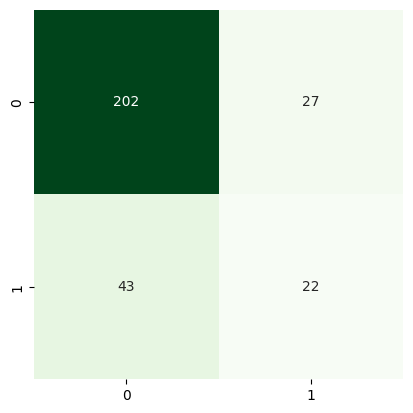

In [453]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train_min,y_train)

#predict
dt_predict=dt.predict(x_test_min)


cm = confusion_matrix(dt_predict,y_test)
print(cm)

print(100*"*")


tn, fp, fn, tp = confusion_matrix(dt_predict,y_test).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

print(100*"*")


sns.heatmap(cm, square=True, annot=True, cmap='Greens', fmt='d', cbar=False)

# Accuracy = TP+TN/TP+FP+FN+TN
dt_acc=accuracy_score(dt_predict,y_test)
print(' accuracy is: ', dt_acc)

print(100*"*")


# Precision = TP/TP+FP
pre = precision_score(dt_predict,y_test)
print('Precision is: ',pre)

print(100*"*")


# Recall = TP/TP+FN
rec = recall_score(dt_predict,y_test)
print('Recall is: ', rec)

print(100*"*")


# F1 Score = 2*(Recall * Precision) / (Recall + Precision)
# f1 = 2*(rec*pre)/(rec+pre)
print('F1 is: ', f1_score(dt_predict,y_test))

print(100*"*")


clf_report = classification_report(dt_predict,y_test)
print(clf_report)

print(100*"*")



[[241  40]
 [  4   9]]
****************************************************************************************************
True negatives:  241 
False positives:  40 
False negatives:  4 
True Positives:  9
****************************************************************************************************
 accuracy is:  0.8503401360544217
****************************************************************************************************
Precision is:  0.1836734693877551
****************************************************************************************************
Recall is:  0.6923076923076923
****************************************************************************************************
F1 is:  0.2903225806451613
****************************************************************************************************
              precision    recall  f1-score   support

           0       0.98      0.86      0.92       281
           1       0.18      0.69      0.29        1

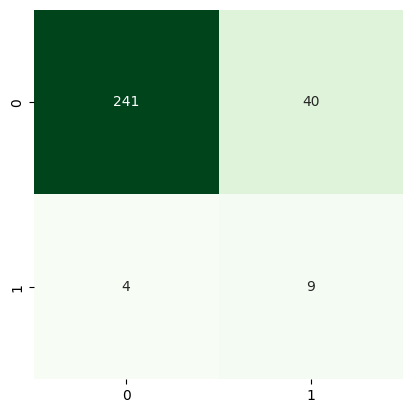

In [454]:
#Random Forest classification
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train_min,y_train)

#predict
rfc_predict=rfc.predict(x_test_min)

cm = confusion_matrix(rfc_predict,y_test)
print(cm)

print(100*"*")

tn, fp, fn, tp = confusion_matrix(rfc_predict,y_test).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)
print(100*"*")


sns.heatmap(cm, square=True, annot=True, cmap='Greens', fmt='d', cbar=False)

# Accuracy = TP+TN/TP+FP+FN+TN
rfc_acc=accuracy_score(rfc_predict,y_test,normalize=True)
print(' accuracy is: ', rfc_acc)

print(100*"*")


# Precision = TP/TP+FP
pre = precision_score(rfc_predict,y_test)
print('Precision is: ',pre)

print(100*"*")


# Recall = TP/TP+FN
rec = recall_score(rfc_predict,y_test)
print('Recall is: ', rec)

print(100*"*")



# F1 Score = 2*(Recall * Precision) / (Recall + Precision)
# f1 = 2*(rec*pre)/(rec+pre)
print('F1 is: ', f1_score(rfc_predict,y_test))

print(100*"*")


clf_report = classification_report(rfc_predict,y_test)
print(clf_report)

print(100*"*")



[[241  33]
 [  4  16]]
****************************************************************************************************
True negatives:  241 
False positives:  33 
False negatives:  4 
True Positives:  16
 accuracy is:  0.8741496598639455
****************************************************************************************************
Precision is:  0.32653061224489793
****************************************************************************************************
Recall is:  0.8
****************************************************************************************************
F1 is:  0.46376811594202894
****************************************************************************************************
              precision    recall  f1-score   support

           0       0.98      0.88      0.93       274
           1       0.33      0.80      0.46        20

    accuracy                           0.87       294
   macro avg       0.66      0.84      0.70       294
we

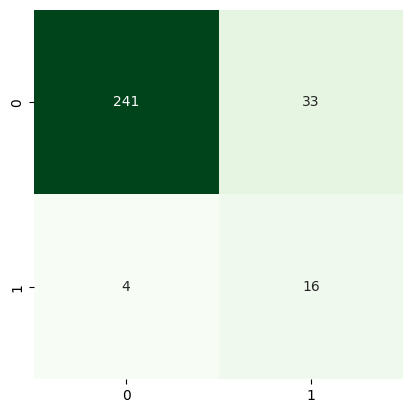

In [455]:
#logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train_min,y_train)

#predict
lr_predict=lr.predict(x_test_min)

cm = confusion_matrix(lr_predict,y_test)
print(cm)

print(100*"*")


tn, fp, fn, tp = confusion_matrix(lr_predict,y_test).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

sns.heatmap(cm, square=True, annot=True, cmap='Greens', fmt='d', cbar=False)

# Accuracy = TP+TN/TP+FP+FN+TN
lr_acc=accuracy_score(lr_predict,y_test)
print(' accuracy is: ', lr_acc)

print(100*"*")


# Precision = TP/TP+FP
pre = precision_score(lr_predict,y_test)
print('Precision is: ',pre)

print(100*"*")


# Recall = TP/TP+FN
rec = recall_score(lr_predict,y_test)
print('Recall is: ', rec)

print(100*"*")


# F1 Score = 2*(Recall * Precision) / (Recall + Precision)
# f1 = 2*(rec*pre)/(rec+pre)
print('F1 is: ', f1_score(lr_predict,y_test))

print(100*"*")


clf_report = classification_report(lr_predict,y_test)
print(clf_report)

print(100*"*")



[[241  41]
 [  4   8]]
****************************************************************************************************
True negatives:  241 
False positives:  41 
False negatives:  4 
True Positives:  8
****************************************************************************************************
 accuracy is:  0.8469387755102041
****************************************************************************************************
Precision is:  0.16326530612244897
****************************************************************************************************
Recall is:  0.6666666666666666
****************************************************************************************************
F1 is:  0.2622950819672131
****************************************************************************************************
              precision    recall  f1-score   support

           0       0.98      0.85      0.91       282
           1       0.16      0.67      0.26        

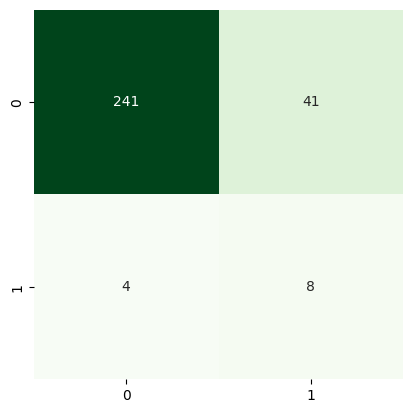

In [456]:
# KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train_min,y_train)

#predict
knn_predict=knn.predict(x_test_min)


cm = confusion_matrix(knn_predict,y_test)
print(cm)

print(100*"*")


tn, fp, fn, tp = confusion_matrix(knn_predict,y_test).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

sns.heatmap(cm, square=True, annot=True, cmap='Greens', fmt='d', cbar=False)

print(100*"*")


# Accuracy = TP+TN/TP+FP+FN+TN
knn_acc=accuracy_score(knn_predict,y_test)
print(' accuracy is: ', knn_acc)

print(100*"*")


# Precision = TP/TP+FP
pre = precision_score(knn_predict,y_test)
print('Precision is: ',pre)

print(100*"*")


# Recall = TP/TP+FN
rec = recall_score(knn_predict,y_test)
print('Recall is: ', rec)

print(100*"*")


# F1 Score = 2*(Recall * Precision) / (Recall + Precision)
# f1 = 2*(rec*pre)/(rec+pre)
print('F1 is: ', f1_score(knn_predict,y_test))

print(100*"*")


clf_report = classification_report(knn_predict,y_test)
print(clf_report)

print(100*"*")



[[244  40]
 [  1   9]]
****************************************************************************************************
True negatives:  244 
False positives:  40 
False negatives:  1 
True Positives:  9
****************************************************************************************************
 accuracy is:  0.8605442176870748
****************************************************************************************************
Precision is:  0.1836734693877551
****************************************************************************************************
Recall is:  0.9
****************************************************************************************************
F1 is:  0.30508474576271183
****************************************************************************************************
              precision    recall  f1-score   support

           0       1.00      0.86      0.92       284
           1       0.18      0.90      0.31        10

    accurac

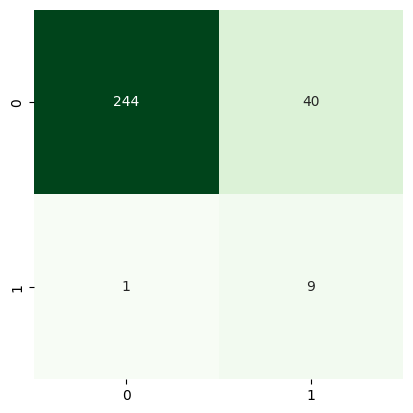

In [457]:
#svc

from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train_min,y_train)

#predict
svc_predict=svc.predict(x_test_min)

cm = confusion_matrix(svc_predict,y_test)
print(cm)

print(100*"*")


tn, fp, fn, tp = confusion_matrix(svc_predict,y_test).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

print(100*"*")


sns.heatmap(cm, square=True, annot=True, cmap='Greens', fmt='d', cbar=False)

# Accuracy = TP+TN/TP+FP+FN+TN
svc_acc=accuracy_score(svc_predict,y_test)
print(' accuracy is: ', svc_acc)

print(100*"*")


# Precision = TP/TP+FP
pre = precision_score(svc_predict,y_test)
print('Precision is: ',pre)

print(100*"*")


# Recall = TP/TP+FN
rec = recall_score(svc_predict,y_test)
print('Recall is: ', rec)

print(100*"*")


# F1 Score = 2*(Recall * Precision) / (Recall + Precision)
# f1 = 2*(rec*pre)/(rec+pre)
print('F1 is: ', f1_score(svc_predict,y_test))

print(100*"*")


clf_report = classification_report(svc_predict,y_test)
print(clf_report)

print(100*"*")



[[201  19]
 [ 44  30]]
****************************************************************************************************
True negatives:  201 
False positives:  19 
False negatives:  44 
True Positives:  30
****************************************************************************************************
 accuracy is:  0.7857142857142857
****************************************************************************************************
Precision is:  0.6122448979591837
****************************************************************************************************
Recall is:  0.40540540540540543
****************************************************************************************************
F1 is:  0.4878048780487805
****************************************************************************************************
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       220
           1       0.61      0.41      0.49      

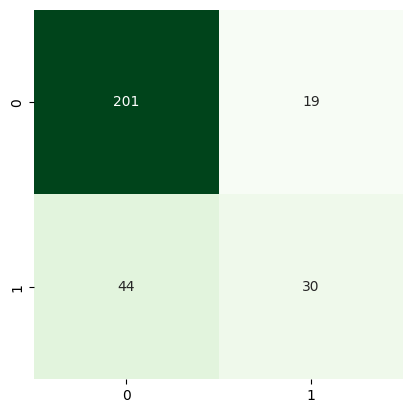

In [458]:
# GaussianNB
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train_min,y_train)

#predict
nb_predict=nb.predict(x_test_min)

cm = confusion_matrix(nb_predict,y_test)
print(cm)

print(100*"*")


tn, fp, fn, tp = confusion_matrix(nb_predict,y_test).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

print(100*"*")


sns.heatmap(cm, square=True, annot=True, cmap='Greens', fmt='d', cbar=False)

# Accuracy = TP+TN/TP+FP+FN+TN
nb_acc=accuracy_score(nb_predict,y_test)
print(' accuracy is: ', nb_acc)

print(100*"*")


# Precision = TP/TP+FP
pre = precision_score(nb_predict,y_test)
print('Precision is: ',pre)

print(100*"*")


# Recall = TP/TP+FN
rec = recall_score(nb_predict,y_test)
print('Recall is: ', rec)

print(100*"*")


# F1 Score = 2*(Recall * Precision) / (Recall + Precision)
# f1 = 2*(rec*pre)/(rec+pre)
print('F1 is: ', f1_score(nb_predict,y_test))

print(100*"*")


clf_report = classification_report(nb_predict,y_test)
print(clf_report)

print(100*"*")



[[215  22]
 [ 30  27]]
****************************************************************************************************
True negatives:  215 
False positives:  22 
False negatives:  30 
True Positives:  27
****************************************************************************************************
 accuracy is:  0.8231292517006803
****************************************************************************************************
Precision is:  0.5510204081632653
****************************************************************************************************
Recall is:  0.47368421052631576
****************************************************************************************************
F1 is:  0.5094339622641509
****************************************************************************************************
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       237
           1       0.55      0.47      0.51      

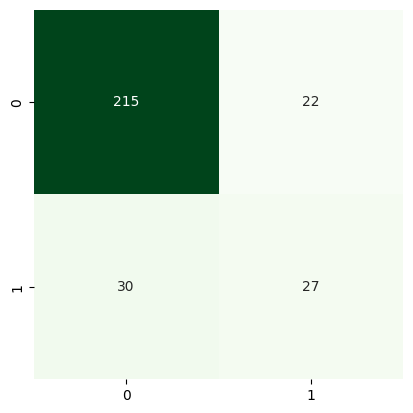

In [459]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(x_train_min,y_train)

#predict
sgd_predict=sgd.predict(x_test_min)

cm = confusion_matrix(sgd_predict,y_test)
print(cm)

print(100*"*")


tn, fp, fn, tp = confusion_matrix(sgd_predict,y_test).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

print(100*"*")

sns.heatmap(cm, square=True, annot=True, cmap='Greens', fmt='d', cbar=False)

# Accuracy = TP+TN/TP+FP+FN+TN
sgd_acc=accuracy_score(sgd_predict,y_test)
print(' accuracy is: ', sgd_acc)

print(100*"*")


# Precision = TP/TP+FP
pre = precision_score(sgd_predict,y_test)
print('Precision is: ',pre)

print(100*"*")


# Recall = TP/TP+FN
rec = recall_score(sgd_predict,y_test)
print('Recall is: ', rec)

print(100*"*")


# F1 Score = 2*(Recall * Precision) / (Recall + Precision)
# f1 = 2*(rec*pre)/(rec+pre)
print('F1 is: ', f1_score(sgd_predict,y_test))

print(100*"*")


clf_report = classification_report(sgd_predict,y_test)
print(clf_report)

print(100*"*")


In [460]:
names = ['DT' , 'RF' , 'LR' , 'KNN' , 'SVC' , 'NB' , 'SGD']
scores = [dt_acc , rfc_acc , lr_acc , knn_acc , svc_acc , nb_acc , sgd_acc]
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)




  Name     Score
0   DT  0.761905
1   RF  0.850340
2   LR  0.874150
3  KNN  0.846939
4  SVC  0.860544
5   NB  0.785714
6  SGD  0.823129


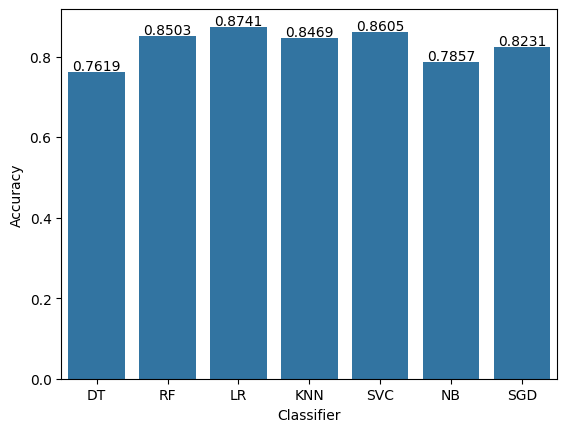

In [461]:
axis = sns.barplot(x = 'Name', y = 'Score', data =tr_split )
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

PCA

In [462]:
from sklearn.decomposition import PCA
pca = PCA()
x_train_pca= pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

[[207  27]
 [ 38  22]]
****************************************************************************************************
True negatives:  207 
False positives:  27 
False negatives:  38 
True Positives:  22
****************************************************************************************************
 accuracy is:  0.7789115646258503
****************************************************************************************************
Precision is:  0.4489795918367347
****************************************************************************************************
Recall is:  0.36666666666666664
****************************************************************************************************
F1 is:  0.4036697247706422
****************************************************************************************************
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       234
           1       0.45      0.37      0.40      

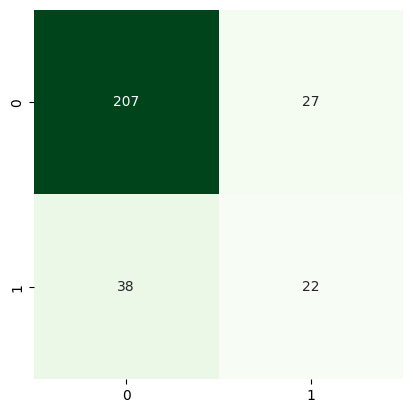

In [463]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train_pca,y_train)

#predict
dt_predict=dt.predict(x_test_pca)


cm = confusion_matrix(dt_predict,y_test)
print(cm)

print(100*"*")


tn, fp, fn, tp = confusion_matrix(dt_predict,y_test).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

print(100*"*")


sns.heatmap(cm, square=True, annot=True, cmap='Greens', fmt='d', cbar=False)

# Accuracy = TP+TN/TP+FP+FN+TN
dt_acc=accuracy_score(dt_predict,y_test)
print(' accuracy is: ', dt_acc)

print(100*"*")


# Precision = TP/TP+FP
pre = precision_score(dt_predict,y_test)
print('Precision is: ',pre)

print(100*"*")

# Recall = TP/TP+FN
rec = recall_score(dt_predict,y_test)
print('Recall is: ', rec)

print(100*"*")


# F1 Score = 2*(Recall * Precision) / (Recall + Precision)
# f1 = 2*(rec*pre)/(rec+pre)
print('F1 is: ', f1_score(dt_predict,y_test))

print(100*"*")


clf_report = classification_report(dt_predict,y_test)
print(clf_report)

print(100*"*")



[[242  40]
 [  3   9]]
****************************************************************************************************
True negatives:  242 
False positives:  40 
False negatives:  3 
True Positives:  9
****************************************************************************************************
 accuracy is:  0.8537414965986394
****************************************************************************************************
Precision is:  0.1836734693877551
****************************************************************************************************
Recall is:  0.75
****************************************************************************************************
F1 is:  0.2950819672131148
****************************************************************************************************
              precision    recall  f1-score   support

           0       0.99      0.86      0.92       282
           1       0.18      0.75      0.30        12

    accurac

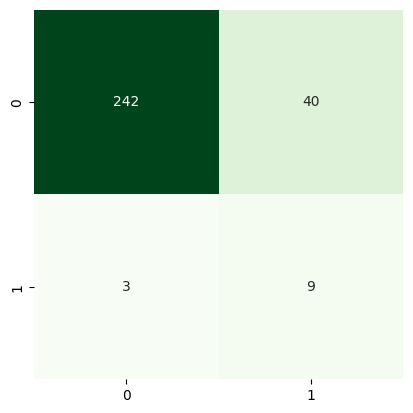

In [464]:
#Random Forest classification
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train_pca,y_train)

#predict
rfc_predict=rfc.predict(x_test_pca)

cm = confusion_matrix(rfc_predict,y_test)
print(cm)

print(100*"*")


tn, fp, fn, tp = confusion_matrix(rfc_predict,y_test).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

print(100*"*")


sns.heatmap(cm, square=True, annot=True, cmap='Greens', fmt='d', cbar=False)

# Accuracy = TP+TN/TP+FP+FN+TN
rfc_acc=accuracy_score(rfc_predict,y_test,normalize=True)
print(' accuracy is: ', rfc_acc)

print(100*"*")

# Precision = TP/TP+FP
pre = precision_score(rfc_predict,y_test)
print('Precision is: ',pre)

print(100*"*")


# Recall = TP/TP+FN
rec = recall_score(rfc_predict,y_test)
print('Recall is: ', rec)

print(100*"*")

# F1 Score = 2*(Recall * Precision) / (Recall + Precision)
# f1 = 2*(rec*pre)/(rec+pre)
print('F1 is: ', f1_score(rfc_predict,y_test))

print(100*"*")

clf_report = classification_report(rfc_predict,y_test)
print(clf_report)

print(100*"*")


[[201  33]
 [ 44  16]]
****************************************************************************************************
True negatives:  201 
False positives:  33 
False negatives:  44 
True Positives:  16
****************************************************************************************************
 accuracy is:  0.7380952380952381
****************************************************************************************************
Precision is:  0.32653061224489793
****************************************************************************************************
Recall is:  0.26666666666666666
****************************************************************************************************
F1 is:  0.29357798165137616
****************************************************************************************************
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       234
           1       0.33      0.27      0.29    

c:\Users\badal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



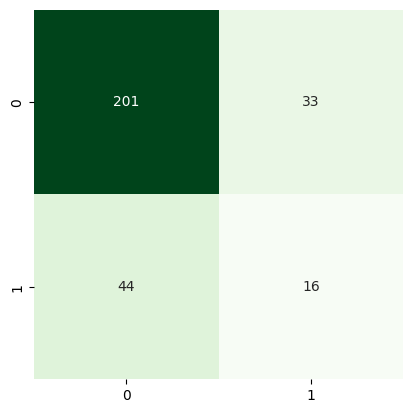

In [465]:
#logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train_pca,y_train)

#predict
lr_predict=lr.predict(x_test_pca)

cm = confusion_matrix(lr_predict,y_test)
print(cm)

print(100*"*")


tn, fp, fn, tp = confusion_matrix(lr_predict,y_test).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

print(100*"*")


sns.heatmap(cm, square=True, annot=True, cmap='Greens', fmt='d', cbar=False)

# Accuracy = TP+TN/TP+FP+FN+TN
lr_acc=accuracy_score(lr_predict,y_test)
print(' accuracy is: ', lr_acc)

print(100*"*")


# Precision = TP/TP+FP
pre = precision_score(lr_predict,y_test)
print('Precision is: ',pre)

print(100*"*")


# Recall = TP/TP+FN
rec = recall_score(lr_predict,y_test)
print('Recall is: ', rec)

print(100*"*")


# F1 Score = 2*(Recall * Precision) / (Recall + Precision)
# f1 = 2*(rec*pre)/(rec+pre)
print('F1 is: ', f1_score(lr_predict,y_test))

print(100*"*")


clf_report = classification_report(lr_predict,y_test)
print(clf_report)

print(100*"*")



[[234  48]
 [ 11   1]]
****************************************************************************************************
True negatives:  234 
False positives:  48 
False negatives:  11 
True Positives:  1
****************************************************************************************************
 accuracy is:  0.7993197278911565
****************************************************************************************************
Precision is:  0.02040816326530612
****************************************************************************************************
Recall is:  0.08333333333333333
****************************************************************************************************
F1 is:  0.032786885245901634
****************************************************************************************************
              precision    recall  f1-score   support

           0       0.96      0.83      0.89       282
           1       0.02      0.08      0.03    

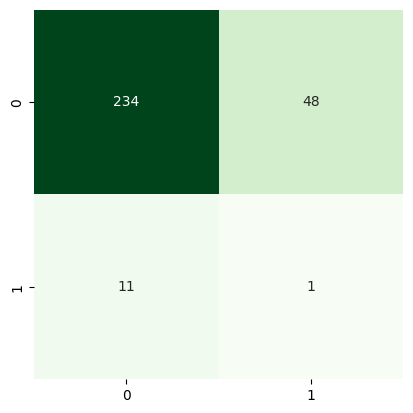

In [466]:
# KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train_pca,y_train)

#predict
knn_predict=knn.predict(x_test_pca)


cm = confusion_matrix(knn_predict,y_test)
print(cm)

print(100*"*")


tn, fp, fn, tp = confusion_matrix(knn_predict,y_test).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

print(100*"*")


sns.heatmap(cm, square=True, annot=True, cmap='Greens', fmt='d', cbar=False)

# Accuracy = TP+TN/TP+FP+FN+TN
knn_acc=accuracy_score(knn_predict,y_test)
print(' accuracy is: ', knn_acc)

print(100*"*")

# Precision = TP/TP+FP
pre = precision_score(knn_predict,y_test)
print('Precision is: ',pre)

print(100*"*")


# Recall = TP/TP+FN
rec = recall_score(knn_predict,y_test)
print('Recall is: ', rec)

print(100*"*")


# F1 Score = 2*(Recall * Precision) / (Recall + Precision)
# f1 = 2*(rec*pre)/(rec+pre)
print('F1 is: ', f1_score(knn_predict,y_test))

print(100*"*")


clf_report = classification_report(knn_predict,y_test)
print(clf_report)

print(100*"*")



[[245  49]
 [  0   0]]
****************************************************************************************************
True negatives:  245 
False positives:  49 
False negatives:  0 
True Positives:  0
****************************************************************************************************
 accuracy is:  0.8333333333333334
****************************************************************************************************
Precision is:  0.0
****************************************************************************************************
Recall is:  0.0
****************************************************************************************************
F1 is:  0.0
****************************************************************************************************
              precision    recall  f1-score   support

           0       1.00      0.83      0.91       294
           1       0.00      0.00      0.00         0

    accuracy                           0.8

c:\Users\badal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.

c:\Users\badal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

c:\Users\badal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

c:\Users\badal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Recall and F-score are ill-def

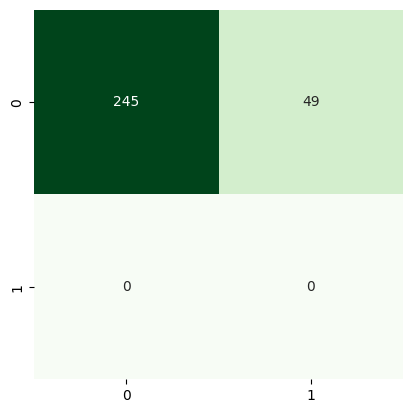

In [467]:
#svc

from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train_pca,y_train)

#predict
svc_predict=svc.predict(x_test_min)

cm = confusion_matrix(svc_predict,y_test)
print(cm)

print(100*"*")


tn, fp, fn, tp = confusion_matrix(svc_predict,y_test).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

print(100*"*")


sns.heatmap(cm, square=True, annot=True, cmap='Greens', fmt='d', cbar=False)

# Accuracy = TP+TN/TP+FP+FN+TN
svc_acc=accuracy_score(svc_predict,y_test)
print(' accuracy is: ', svc_acc)

print(100*"*")


# Precision = TP/TP+FP
pre = precision_score(svc_predict,y_test)
print('Precision is: ',pre)

print(100*"*")


# Recall = TP/TP+FN
rec = recall_score(svc_predict,y_test)
print('Recall is: ', rec)

print(100*"*")


# F1 Score = 2*(Recall * Precision) / (Recall + Precision)
# f1 = 2*(rec*pre)/(rec+pre)
print('F1 is: ', f1_score(svc_predict,y_test))

print(100*"*")


clf_report = classification_report(svc_predict,y_test)
print(clf_report)

print(100*"*")



[[236  48]
 [  9   1]]
****************************************************************************************************
True negatives:  236 
False positives:  48 
False negatives:  9 
True Positives:  1
****************************************************************************************************
 accuracy is:  0.8061224489795918
****************************************************************************************************
Precision is:  0.02040816326530612
****************************************************************************************************
Recall is:  0.1
****************************************************************************************************
F1 is:  0.033898305084745756
****************************************************************************************************
              precision    recall  f1-score   support

           0       0.96      0.83      0.89       284
           1       0.02      0.10      0.03        10

    accur

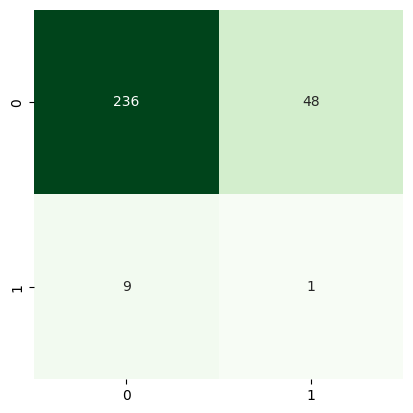

In [468]:
# GaussianNB
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train_pca,y_train)

#predict
nb_predict=nb.predict(x_test_min)

cm = confusion_matrix(nb_predict,y_test)
print(cm)

print(100*"*")


tn, fp, fn, tp = confusion_matrix(nb_predict,y_test).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

print(100*"*")


sns.heatmap(cm, square=True, annot=True, cmap='Greens', fmt='d', cbar=False)

# Accuracy = TP+TN/TP+FP+FN+TN
nb_acc=accuracy_score(nb_predict,y_test)
print(' accuracy is: ', nb_acc)

print(100*"*")


# Precision = TP/TP+FP
pre = precision_score(nb_predict,y_test)
print('Precision is: ',pre)

print(100*"*")


# Recall = TP/TP+FN
rec = recall_score(nb_predict,y_test)
print('Recall is: ', rec)

print(100*"*")


# F1 Score = 2*(Recall * Precision) / (Recall + Precision)
# f1 = 2*(rec*pre)/(rec+pre)
print('F1 is: ', f1_score(nb_predict,y_test))

print(100*"*")


clf_report = classification_report(nb_predict,y_test)
print(clf_report)

print(100*"*")



[[245  49]
 [  0   0]]
****************************************************************************************************
True negatives:  245 
False positives:  49 
False negatives:  0 
True Positives:  0
****************************************************************************************************
 accuracy is:  0.8333333333333334
****************************************************************************************************
Precision is:  0.0
****************************************************************************************************
Recall is:  0.0
****************************************************************************************************
F1 is:  0.0
****************************************************************************************************
              precision    recall  f1-score   support

           0       1.00      0.83      0.91       294
           1       0.00      0.00      0.00         0

    accuracy                           0.8

c:\Users\badal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.

c:\Users\badal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

c:\Users\badal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

c:\Users\badal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Recall and F-score are ill-def

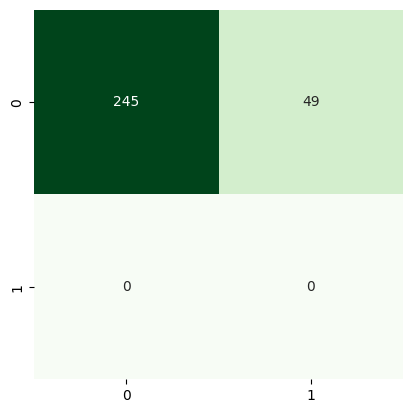

In [469]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(x_train_pca,y_train)

#predict
sgd_predict=sgd.predict(x_test_min)

cm = confusion_matrix(sgd_predict,y_test)
print(cm)

print(100*"*")


tn, fp, fn, tp = confusion_matrix(sgd_predict,y_test).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

print(100*"*")

sns.heatmap(cm, square=True, annot=True, cmap='Greens', fmt='d', cbar=False)

# Accuracy = TP+TN/TP+FP+FN+TN
sgd_acc=accuracy_score(sgd_predict,y_test)
print(' accuracy is: ', sgd_acc)

print(100*"*")


# Precision = TP/TP+FP
pre = precision_score(sgd_predict,y_test)
print('Precision is: ',pre)

print(100*"*")


# Recall = TP/TP+FN
rec = recall_score(sgd_predict,y_test)
print('Recall is: ', rec)

print(100*"*")


# F1 Score = 2*(Recall * Precision) / (Recall + Precision)
# f1 = 2*(rec*pre)/(rec+pre)
print('F1 is: ', f1_score(sgd_predict,y_test))

print(100*"*")


clf_report = classification_report(sgd_predict,y_test)
print(clf_report)

print(100*"*")


In [470]:

names = ['DT' , 'RF' , 'LR' , 'KNN' , 'SVC' , 'NB' , 'SGD']
scores = [dt_acc , rfc_acc , lr_acc , knn_acc , svc_acc , nb_acc , sgd_acc]
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)



  Name     Score
0   DT  0.778912
1   RF  0.853741
2   LR  0.738095
3  KNN  0.799320
4  SVC  0.833333
5   NB  0.806122
6  SGD  0.833333


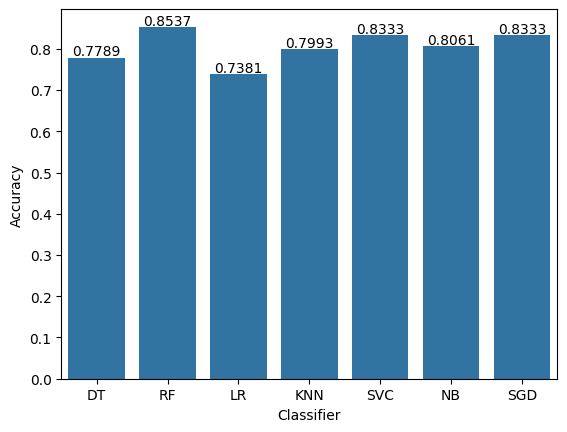

In [471]:
axis = sns.barplot(x = 'Name', y = 'Score', data =tr_split )
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()